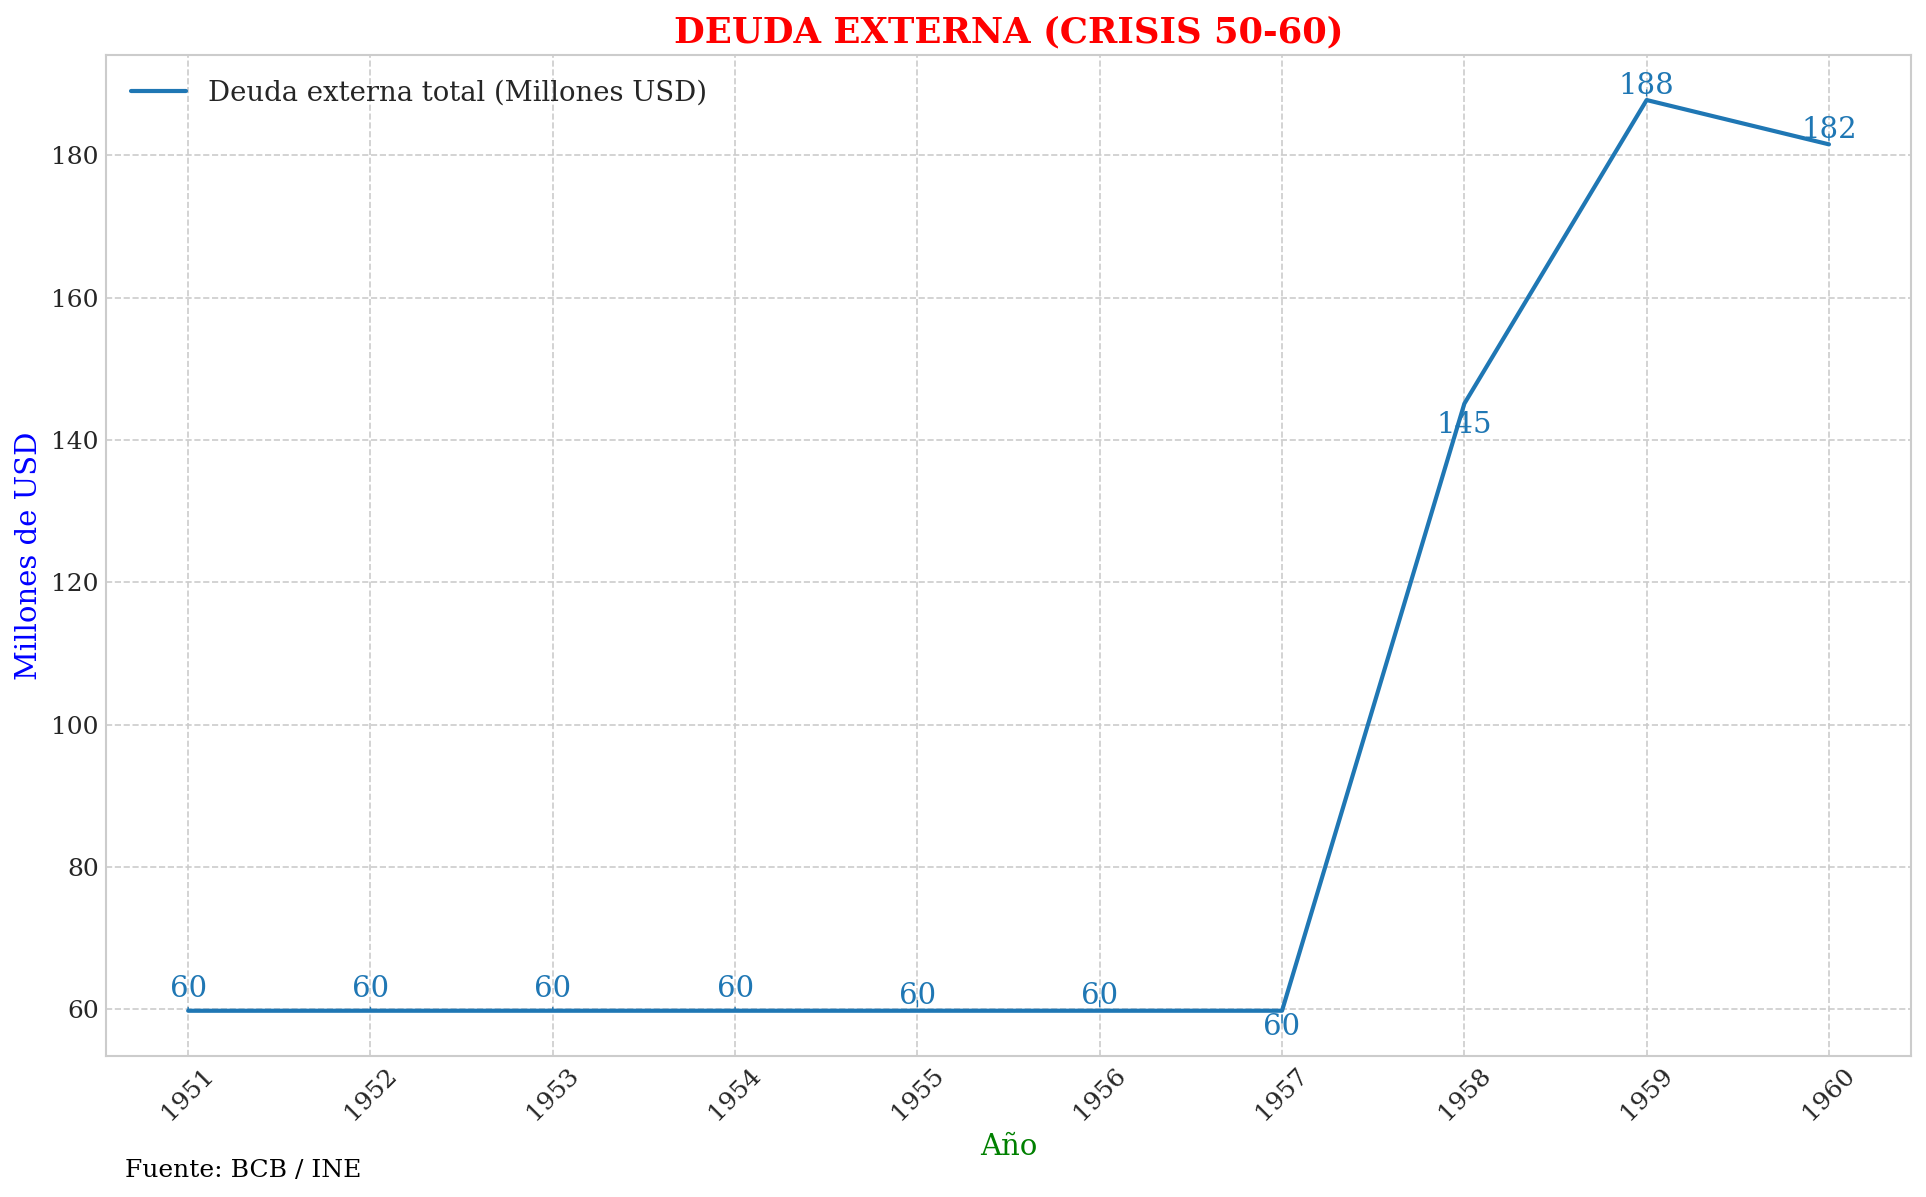

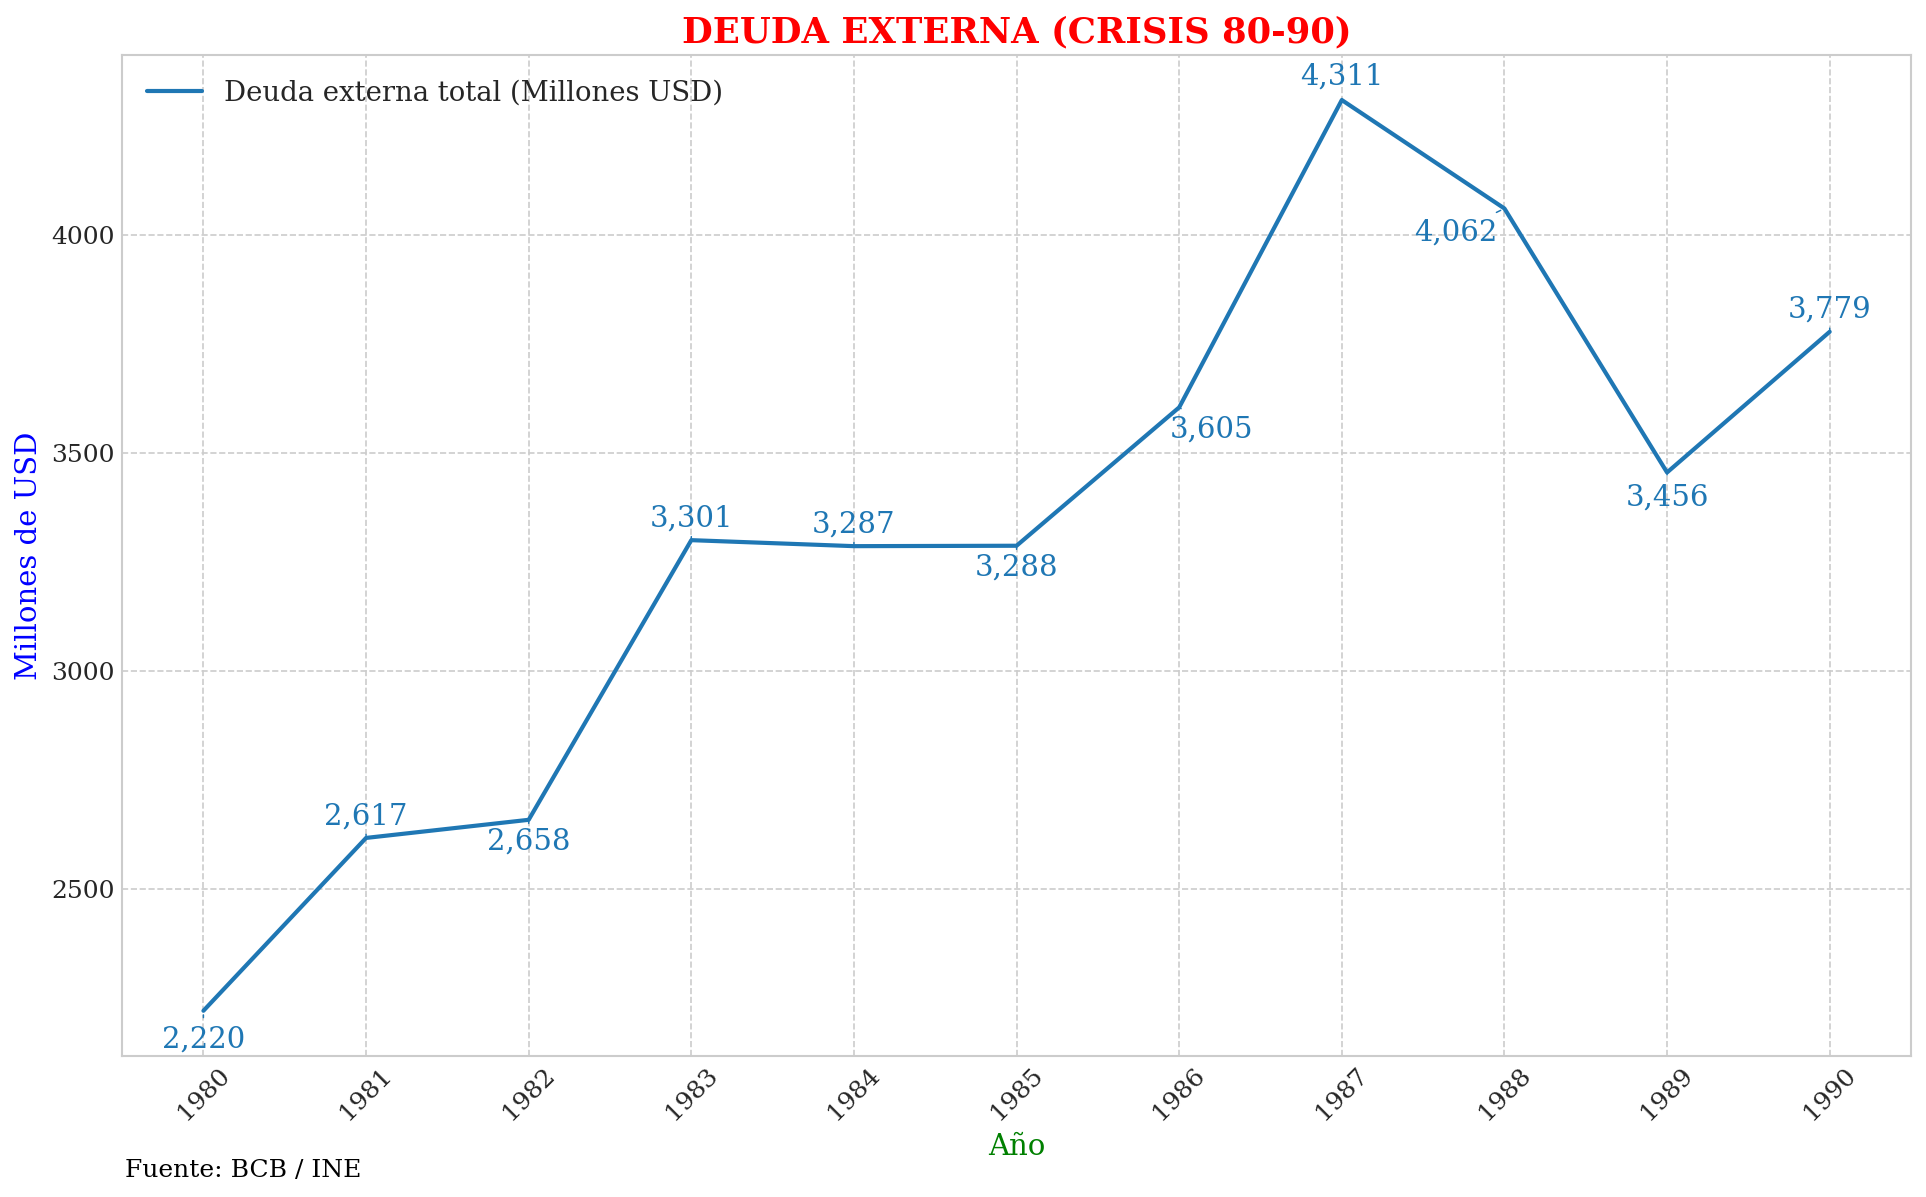

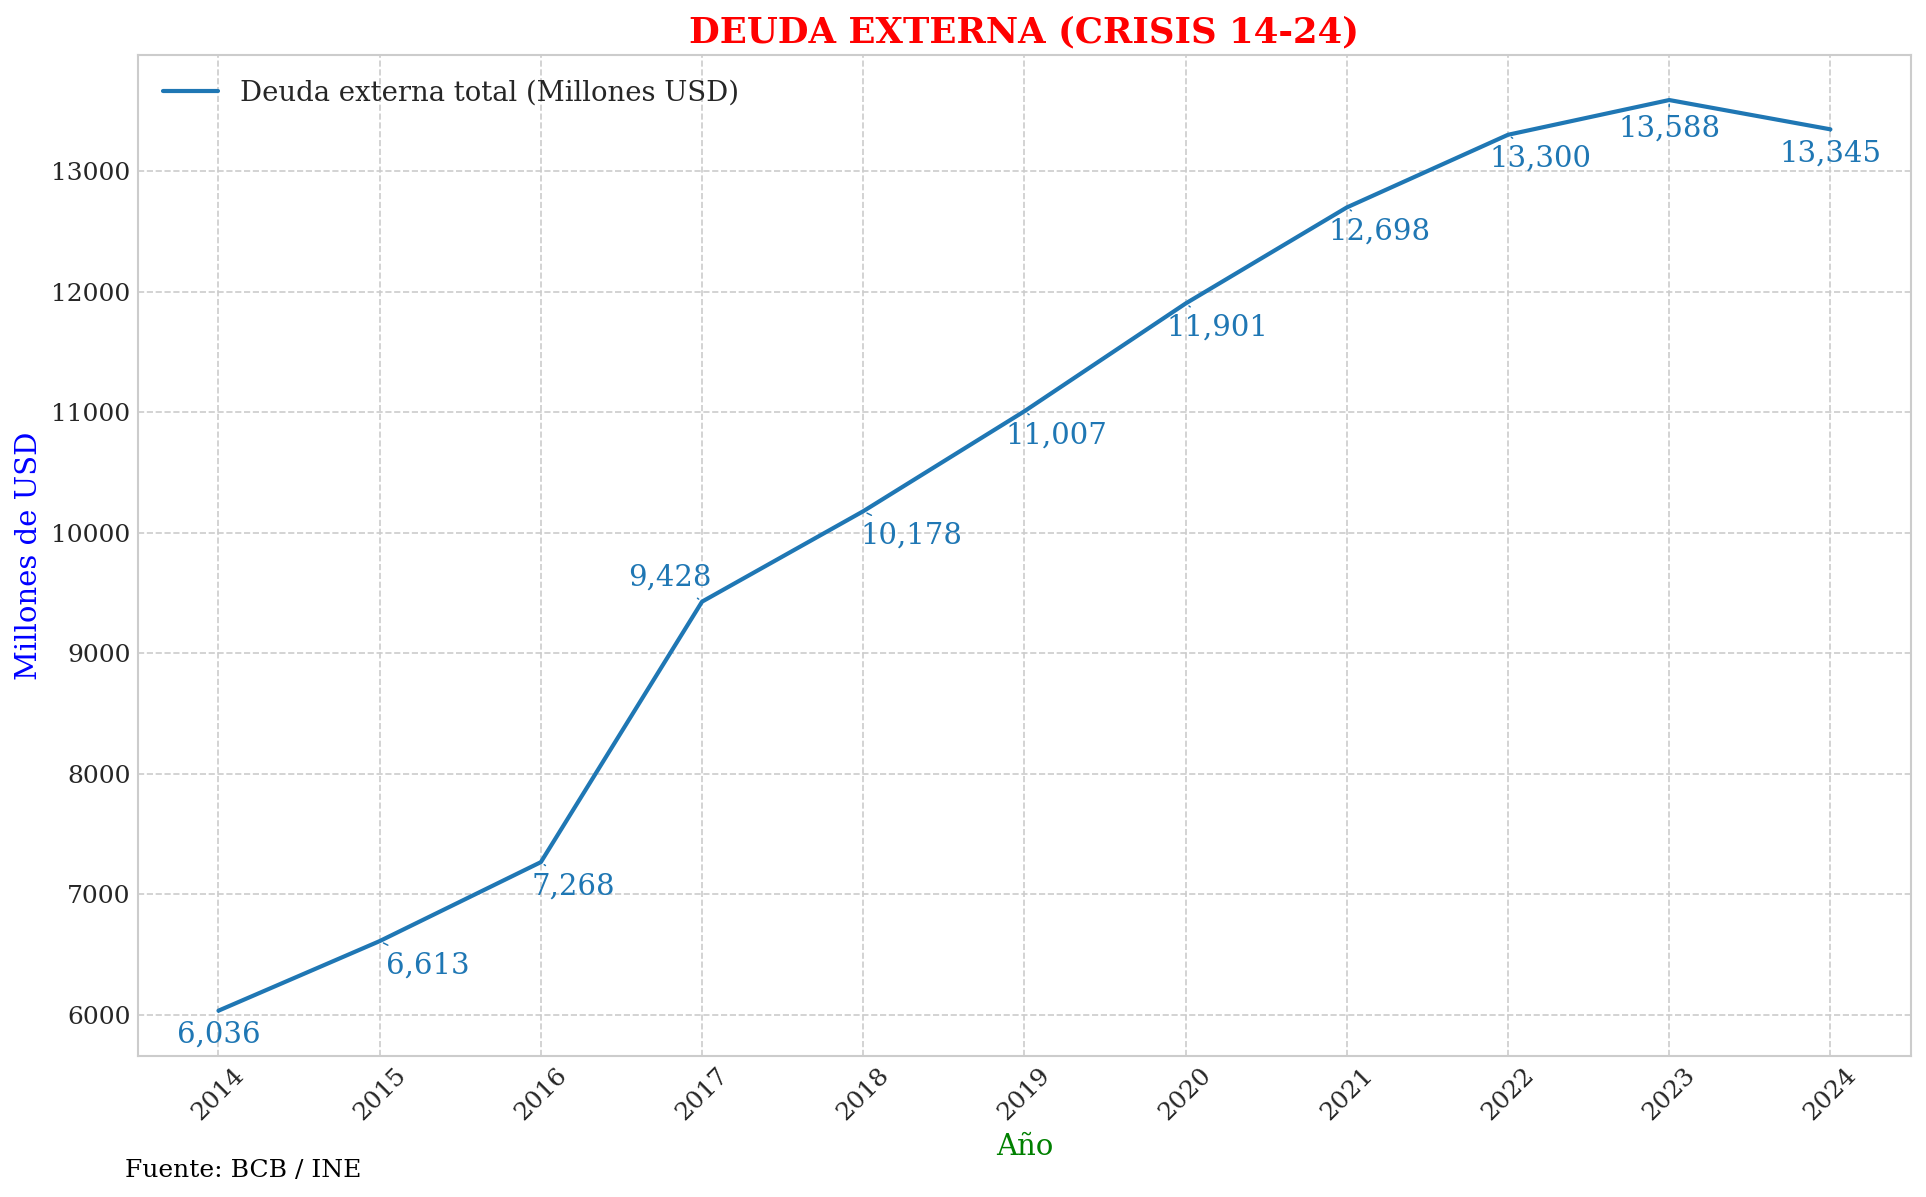

In [1]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Si aún no instalaste el paquete en editable, descomenta:
# sys.path.append(os.path.abspath('../'))

from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot,
    add_year_value_annotations
)
from func_auxiliares.config import DB_PATH, ASSETS_DIR, PERIODOS_PARA_CRISIS

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = ASSETS_DIR / "crisis" / "deuda_externa_total"
output_dir.mkdir(parents=True, exist_ok=True)

set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      deuda
    FROM deuda_externa_total
    ORDER BY año
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes      = [("deuda", "Deuda externa total (Millones USD)")]
cols_componentes = [col for col, _ in componentes]
colors      = {"deuda": "#1f77b4"}

# ─────────────────────────────────────────────────────────────────────
# Offsets y años extra para anotaciones
# ─────────────────────────────────────────────────────────────────────
annotation_offsets = {
    "deuda": {
        1950: (0,  3),
        1951: (0,  3),
        1952: (0,  3),
        1953: (0,  3),
        1954: (0,  3),
        1955: (0,  2),
        1956: (0,  2),
        1957: (0,  -2.3),
        1958: (0, -3),  
        1959: (0,  2),
        1960: (0,  2),


        1980: (0,  -67),   
        1981: (0,  50),
        1982: (0,  -50),
        1983: (0,  50),
        1984: (0,  50),
        1985: (0,  -50),
        1986: (0.2,  -50),
        1987: (0, 55),   
        1988: (-0.3,  -55),
        1989: (0,  -57),
        1990: (0,  50),

        2014: (0,  -200),  
        2015: (0.3,  -200),   
        2016: (0.2, -200),   
        2017: (-0.2,  200),
        2018: (0.3,  -200),
        2019: (0.2,  -200),
        2020: (0.2, -200), 
        2021: (0.2,  -200),  
        2022: (0.2,  -200),
        2023: (0,  -240),
        2024: (0,  -200),   
    }
}

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo de crisis
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    # Recorta al rango disponible en df
    sub = df.loc[ini:fin]
    if sub.empty:
        continue  # salta si no hay datos en ese rango
    #si sub tiene solo 3 datos
    if len(sub) < 4:
        print(f"Subperíodo {nombre} tiene menos de 3 datos, omitiendo.")
        continue

    # Calcula años a anotar: siempre ini/fin + extras dentro del rango
    years_to_annot = list(sub.index)  # Aquí tomas los años directamente del índice del DataFrame

    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"DEUDA EXTERNA ({nombre.upper()})",
        xlabel="Año",
        ylabel="Millones de USD",
        source_text="Fuente: BCB / INE"
    )

    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.7
    )

    fig.savefig(output_dir / f"deuda_externa_{nombre}.png")
    plt.show()  # Muestra la gráfica en pantalla
    plt.close(fig) 